In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
Suicide = pd.read_csv('/content/Suicide_Detection.csv')

In [6]:
Suicide

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
10444,15701,I have 33 followers And i dont do anything. Im...,non-suicide
10445,15702,How do I say thank you So I'm at a restaurant ...,non-suicide
10446,15703,I'm 25and I just want someone to tell me it's ...,suicide
10447,15705,Circumcision makes me feel suicidalHi communit...,suicide


In [9]:
Suicide.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [10]:
Suicide.describe

<bound method NDFrame.describe of        Unnamed: 0                                               text  \
0               2  Ex Wife Threatening SuicideRecently I left my ...   
1               3  Am I weird I don't get affected by compliments...   
2               4  Finally 2020 is almost over... So I can never ...   
3               8          i need helpjust help me im crying so hard   
4               9  I’m so lostHello, my name is Adam (16) and I’v...   
...           ...                                                ...   
10444       15701  I have 33 followers And i dont do anything. Im...   
10445       15702  How do I say thank you So I'm at a restaurant ...   
10446       15703  I'm 25and I just want someone to tell me it's ...   
10447       15705  Circumcision makes me feel suicidalHi communit...   
10448       15706  If I blow my brains out everyone will just for...   

             class  
0          suicide  
1      non-suicide  
2      non-suicide  
3          suicid

In [11]:
Suicide.isnull()

,Unnamed: 0,text,class
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
10444,False,False,False
10445,False,False,False
10446,False,False,False
10447,False,False,False


In [14]:
Suicide.isnull().sum()

Unnamed: 0    0
text          0
class         1
dtype: int64

In [15]:
Suicide.shape

(10449, 3)

In [16]:
Suicide.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [17]:
Suicide['text'][1]

"Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it"

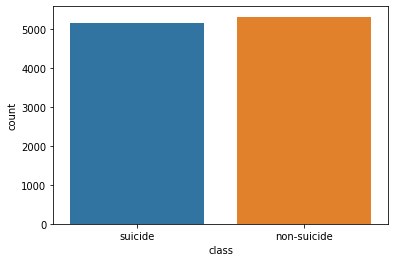

In [19]:
sns.countplot(Suicide['class'])
plt.show()

In [20]:
Suicide['Length'] = Suicide['text'].apply(lambda x: len(x.split(' ')))
Suicide['Length'].describe()

count    10449.000000
mean       128.535075
std        197.998208
min          1.000000
25%         26.000000
50%         60.000000
75%        152.000000
max       3455.000000
Name: Length, dtype: float64

In [21]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Suicide['Length'].quantile(i))

15.0
22.0
30.0
42.0
60.0
85.0
125.0
189.0
309.0


In [22]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Suicide['Length'].quantile(i))

331.0
357.0
381.0
416.0
454.0
512.0
587.5599999999995
699.0
940.6000000000022


In [23]:
Suicide = Suicide[Suicide.Length<=317]

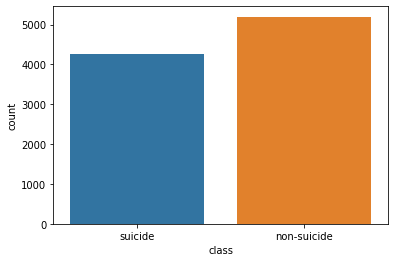

In [24]:
sns.countplot(Suicide['class'])
plt.show()

In [25]:
len(Suicide)

9450

In [26]:
Words = list()
for i in Suicide['text']:
    for j in i.split(' '):
        Words.append(j.upper())
len(Words)

756416

In [27]:
from collections import Counter


In [28]:
Words_Freq = Counter(Words)
Words_Freq = pd.DataFrame({'Word':list(Words_Freq.keys()),'Frequency':list(Words_Freq.values())})
Words_Freq.sort_values('Frequency',ascending=False,inplace=True)
Words_Freq.head(70)

,Word,Frequency
4,I,39942
18,TO,25251
16,AND,21070
90,THE,15959
30,A,15210
...,...,...
404,CAN'T,1641
460,DON’T,1625
496,GOING,1623
101,IT'S,1572


In [29]:
len(Words_Freq)

48788

In [30]:
Words_Freq['Frequency'].describe()

count    48788.000000
mean        15.504140
std        305.357231
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      39942.000000
Name: Frequency, dtype: float64

In [31]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(Words_Freq['Frequency'].quantile(i))


181.91700000000128
218.7039999999979
253.4910000000018
309.2780000000057
418.13000000000466
543.9639999999927
706.6390000000029
1116.1299999999974
2125.0940000001283


In [32]:
Words_Freq = Words_Freq[Words_Freq['Frequency']>Words_Freq['Frequency'].quantile(0.99)]
len(Words_Freq)

488

In [33]:
Words_Freq['Frequency'].describe()

count      488.000000
mean      1131.729508
std       2839.821616
min        158.000000
25%        233.750000
50%        419.000000
75%        850.250000
max      39942.000000
Name: Frequency, dtype: float64

In [34]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] < 31905]
Words_Freq.head()

,Word,Frequency
18,TO,25251
16,AND,21070
90,THE,15959
30,A,15210
6,MY,14222


In [35]:
len(Words_Freq)

487

In [36]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(Words_Freq['Frequency'].quantile(i))


12665.037999999902
14332.656000000023
14812.824000000013
15272.916000000045
15636.929999999995
16245.215999999915
18729.161999999862
21187.068000000083
23219.03400000028


In [37]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] >= 3615.8130000000237]
Words_Freq.tail()

,Word,Frequency
350,WANT,4264
215,WAS,3964
172,NOT,3947
68,DO,3909
13,ON,3902


In [38]:
len(Words_Freq)

28

In [39]:
Final_Words = list(Words_Freq.Word)
for i in Final_Words:
    Suicide[i] = Suicide['text'].apply(lambda x: 1 if i in x.upper().split(' ') else 0)
Suicide.drop('text',axis=1,inplace=True)
Suicide.head()

,Unnamed: 0,class,Length,TO,AND,THE,A,MY,OF,IT,...,BE,LIKE,YOU,,WITH,WANT,WAS,NOT,DO,ON
0,2,suicide,143,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,1
1,3,non-suicide,27,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,4,non-suicide,26,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,suicide,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,suicide,289,1,1,1,1,1,1,1,...,1,1,0,0,1,0,1,1,1,1


In [40]:
Suicide['class'] = Suicide['class'].apply(lambda x: 1 if x == 'suicide' else 0)
Suicide.head()

,Unnamed: 0,class,Length,TO,AND,THE,A,MY,OF,IT,...,BE,LIKE,YOU,,WITH,WANT,WAS,NOT,DO,ON
0,2,1,143,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,1
1,3,0,27,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,4,0,26,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,1,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,1,289,1,1,1,1,1,1,1,...,1,1,0,0,1,0,1,1,1,1


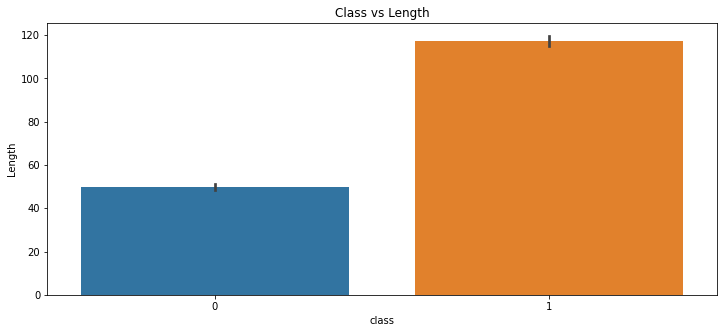

In [41]:
plt.figure(figsize=(12,5))
sns.barplot(x='class',y='Length',data=Suicide)
plt.title('Class vs Length')
plt.show()

In [42]:
from scipy.stats import pearsonr

In [44]:
Correlations = dict()
var = list(Suicide.columns)
var.remove('class')
for i in var:
    Correlations[i] = pearsonr(Suicide[i],Suicide['class'])[0]
Correlations = pd.DataFrame({'Feature':list(Correlations.keys()),'Correlation':list(Correlations.values())})
Correlations.sort_values('Correlation',ascending=False,inplace=True)
Correlations.set_index('Feature')
Correlations.head(10)

,Feature,Correlation
1,Length,0.449696
25,WANT,0.383194
2,TO,0.378120
6,MY,0.321691
7,OF,0.314538
20,BE,0.304675
19,I'M,0.304290
16,HAVE,0.301853
12,JUST,0.298492
13,BUT,0.298137


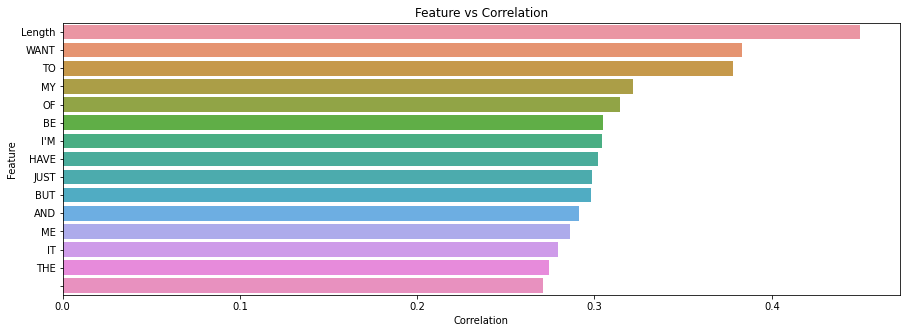

In [45]:
temp = Correlations.head(15)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()

In [46]:
Correlations.tail(15)

,Feature,Correlation
18,THIS,0.264231
14,THAT,0.264136
9,IN,0.259524
15,FOR,0.252485
24,WITH,0.249374
28,DO,0.246981
27,NOT,0.234611
10,IS,0.223620
17,SO,0.208434
5,A,0.195153


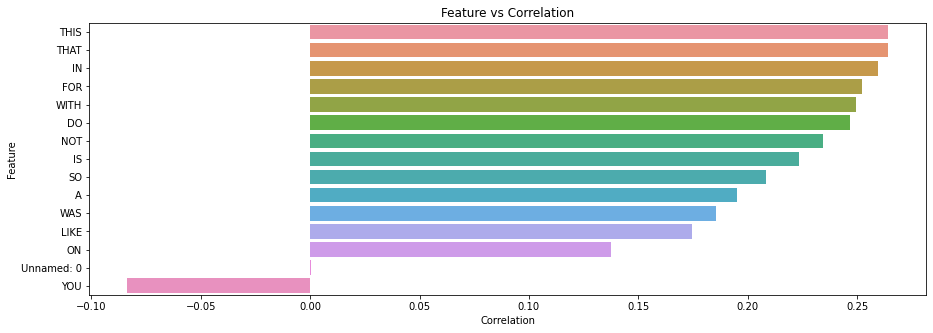

In [103]:
temp = Correlations.tail(15)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()

In [48]:
Suicide_Pred = Suicide.drop('Length',axis=1)

In [ ]:
len(Suicide_Pred)

9450

In [49]:
Suicide_Pred.head()

,Unnamed: 0,class,TO,AND,THE,A,MY,OF,IT,IN,...,BE,LIKE,YOU,,WITH,WANT,WAS,NOT,DO,ON
0,2,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,1
1,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,0,1,1,1,1


In [51]:
from sklearn.model_selection import train_test_split

In [59]:
X = Suicide_Pred.drop('class',axis=1)
y = Suicide_Pred['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.01,random_state=1)
X_train.head()

,Unnamed: 0,TO,AND,THE,A,MY,OF,IT,IN,IS,...,BE,LIKE,YOU,,WITH,WANT,WAS,NOT,DO,ON
170,255,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
984,1462,1,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7093,10635,1,1,0,1,1,1,0,1,0,...,0,1,0,0,0,1,1,0,1,0
298,442,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
107,161,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X

,Unnamed: 0,TO,AND,THE,A,MY,OF,IT,IN,IS,...,BE,LIKE,YOU,,WITH,WANT,WAS,NOT,DO,ON
0,2,1,1,1,1,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,1
1,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,15701,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
10445,15702,1,1,1,1,0,0,0,0,0,...,1,0,1,0,1,1,0,0,1,0
10446,15703,1,0,0,0,1,0,1,0,1,...,0,1,0,1,1,1,0,1,0,0
10447,15705,1,1,1,1,1,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0


In [63]:
y

0        1
1        0
2        0
3        1
5        1
        ..
10444    0
10445    0
10446    1
10447    1
10448    0
Name: class, Length: 9450, dtype: int64

In [71]:
len(X_train)

94

In [72]:
y_train.value_counts()

0    54
1    40
Name: class, dtype: int64

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
reg=LinearRegression()

In [75]:
reg.fit(X_train, y_train)

LinearRegression()

In [78]:
reg.predict(X_test)

array([0.27147316, 1.63956165, 0.13636056, ..., 1.09300429, 0.38002337,
       0.12267577])

In [79]:

y_test

9947     0
9448     1
2848     0
7479     0
7415     1
        ..
10346    1
544      0
8543     1
9722     1
3546     0
Name: class, Length: 9356, dtype: int64

In [86]:
reg.intercept_

-0.1462809502461228

In [87]:
reg.coef_

array([ 2.32625653e-05,  2.97287715e-01, -2.65947888e-02,  1.55828814e-02,
       -2.85431270e-02,  1.33709772e-01, -2.90265700e-03, -1.03205070e-01,
        5.67686301e-03,  4.36795103e-02, -2.20956083e-02,  6.24170431e-02,
        6.86482322e-03, -1.06308793e-01, -2.50269855e-02,  9.28450217e-02,
        6.41665024e-02, -4.64391251e-02,  9.22091658e-02,  1.46443007e-01,
        5.03116947e-02, -1.44825636e-01,  4.19791834e-01, -1.11815755e-01,
        2.27541855e-01,  1.33466409e-01, -4.09010444e-02,  5.85404296e-02,
       -9.16186685e-03])

In [88]:
reg.predict(X_test)

array([0.27147316, 1.63956165, 0.13636056, ..., 1.09300429, 0.38002337,
       0.12267577])

In [91]:
y_test

9947     0
9448     1
2848     0
7479     0
7415     1
        ..
10346    1
544      0
8543     1
9722     1
3546     0
Name: class, Length: 9356, dtype: int64

In [92]:
reg.score(X_test,y_test)

0.18750628861050322

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [101]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1)

params = {'n_estimators':[200],
          'max_depth':[3,5,10,12,15,17,20],
          'max_features':[0.1,0.15,0.2,0.25,0.3],
          'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 12, 15, 17, 20],
                         'max_features': [0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [102]:
Model_best = grid_search.best_estimator_

In [104]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print('Train accuracy score :',accuracy_score(y_train,y_train_pred))
print('Test accuracy score :',accuracy_score(y_test,y_test_pred))
print('Train recall score :',recall_score(y_train,y_train_pred))
print('Test recall score :',recall_score(y_test,y_test_pred))

Train accuracy score : 1.0
Test accuracy score : 0.750213766566909
Train recall score : 1.0
Test recall score : 0.7017585551330798


In [105]:
Feature_Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_Importance.sort_values(by='Importance',ascending=False,inplace=True)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head()

,Importance
Feature,
Length,0.198667
Unnamed: 0,0.091800
MY,0.082542
JUST,0.048746
WANT,0.044681


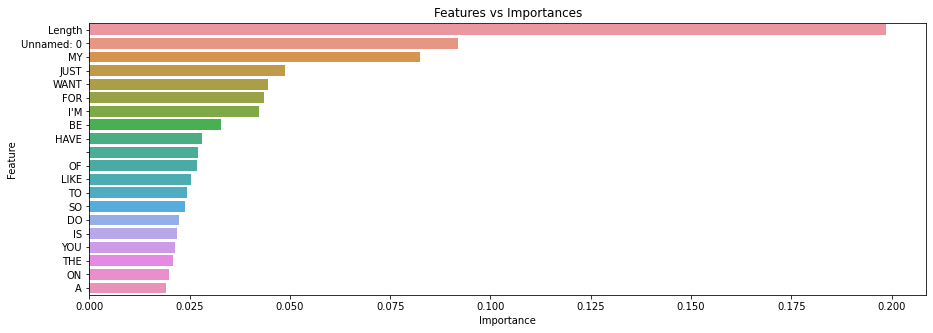

In [106]:
temp = Feature_Importance.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Importance,y=temp.index)
plt.title('Features vs Importances')
plt.show()

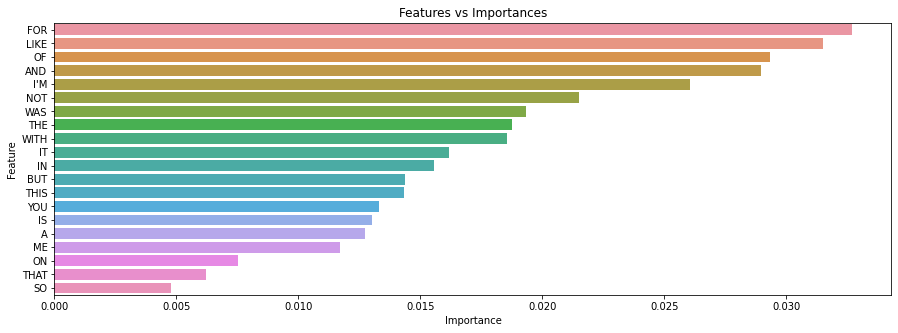

In [99]:
temp = Feature_Importance.tail(20)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Importance,y=temp.index)
plt.title('Features vs Importances')
plt.show()

In [100]:
X = Suicide.drop('class',axis=1)
y = Suicide['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.01,random_state=100)
X_train.head()

,Unnamed: 0,Length,TO,AND,THE,A,MY,OF,IT,IN,...,BE,LIKE,YOU,,WITH,WANT,WAS,NOT,DO,ON
887,1316,248,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,0,1,1,0
479,716,17,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2352,3527,275,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5420,8119,17,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7087,10625,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn = KNeighborsClassifier(n_neighbors=31)

In [119]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=31)

In [120]:
pred=knn.predict(X)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [121]:
knn.predict(X).shape

(9450,)

In [122]:
knn.score(X,y)

0.7263492063492063

In [123]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [124]:
accuracy_score(y,pred)

0.7263492063492063

In [125]:
confusion_matrix(y,pred)

array([[4418,  781],
       [1805, 2446]])

In [129]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77      5199
           1       0.76      0.58      0.65      4251

    accuracy                           0.73      9450
   macro avg       0.73      0.71      0.71      9450
weighted avg       0.73      0.73      0.72      9450

